In [10]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [111]:
Tra = loadmat("Tra_2.mat")["Tra_2"]

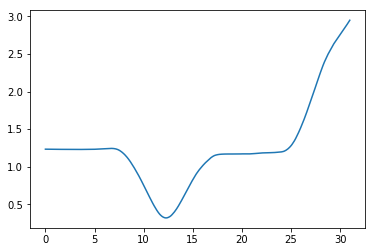

In [155]:
x   = Tra[0, :]
y   = Tra[1, :]
phi = Tra[2, :]
v   = Tra[3, :]
t   = Tra[4, :]
yr  = Tra[5, :]
plt.plot(t, phi)

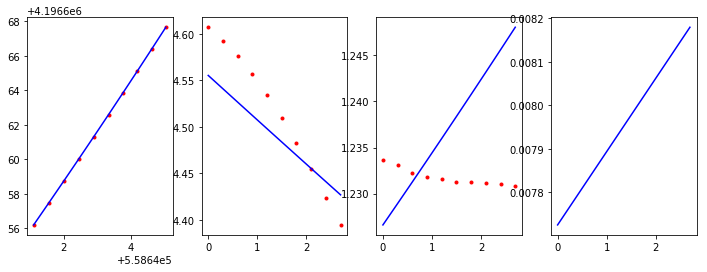

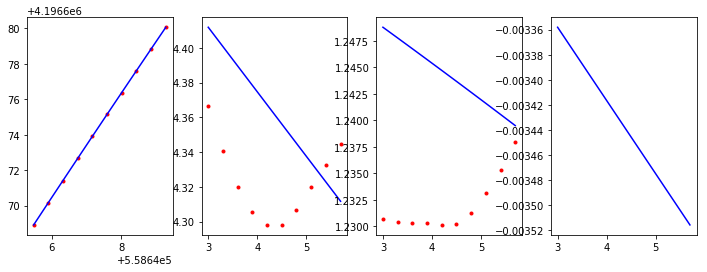

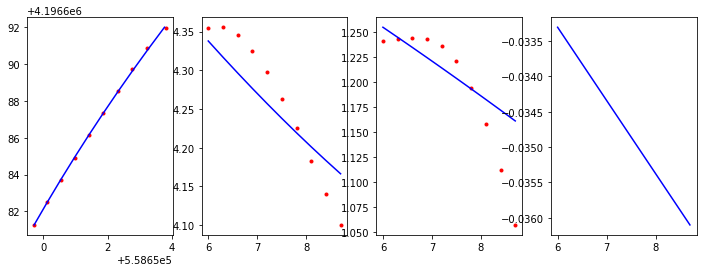

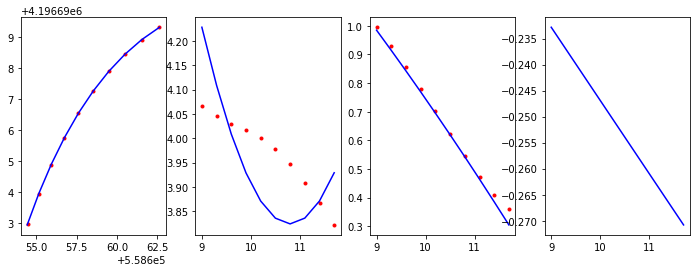

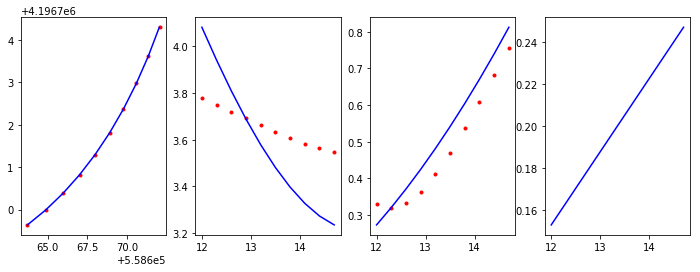

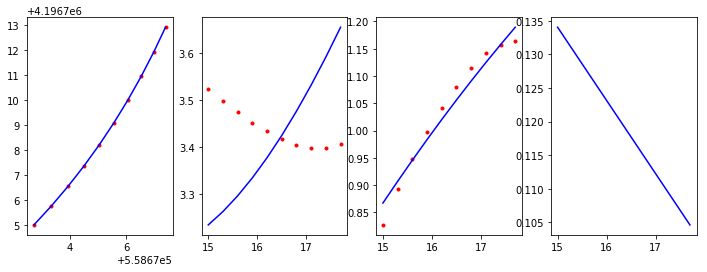

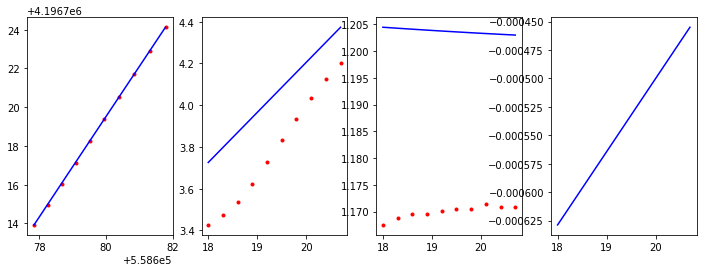

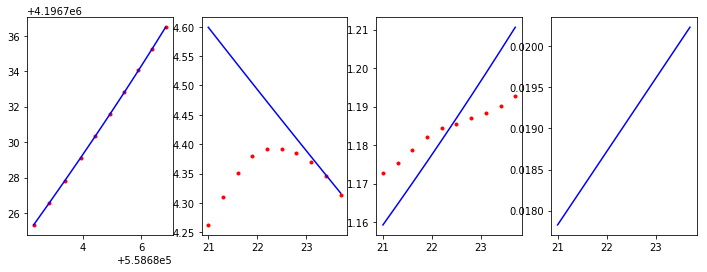

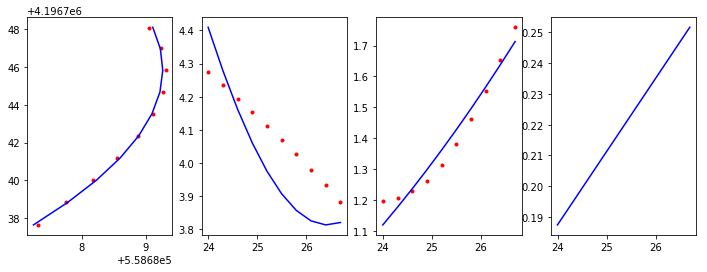

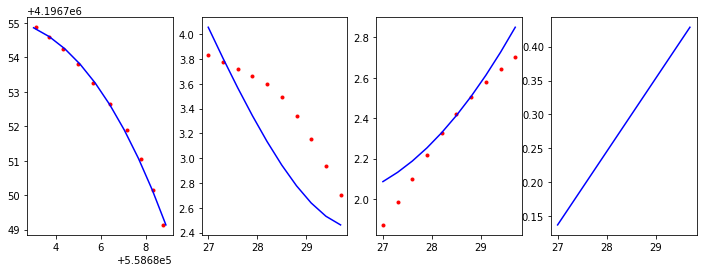

In [186]:
num_points = 300
w = np.ones(num_points) * 0.1
w[0] = w[0] * 30
w[-1] = w[-1] * 30
spl_phi = np.zeros(0)
spl_yr = np.zeros(0)
spl_t = np.zeros(0)
for i in range(0, Tra.shape[1]-num_points, num_points):
    t_sub   = t[np.arange(i, num_points+i, 30)]
    x_sub   = x[np.arange(i, num_points+i, 30)]
    y_sub   = y[np.arange(i, num_points+i, 30)]
    v_sub   = v[np.arange(i, num_points+i, 30)]
    phi_sub = phi[np.arange(i, num_points+i, 30)]

    spl_x = UnivariateSpline(t_sub, x_sub, k=2)
    spl_y = UnivariateSpline(t_sub, y_sub, k=2)
    
    spl_x_dot = spl_x.derivative()
    spl_y_dot = spl_y.derivative()
    spl_v_sub = np.sqrt(spl_x_dot(t_sub)**2 + spl_y_dot(t_sub)**2)
    spl_phi_sub = np.arctan2(spl_y_dot(t_sub), spl_x_dot(t_sub))
    spl_yr_fn = UnivariateSpline(t_sub, spl_phi_sub, k=2).derivative()
    spl_phi_sub = UnivariateSpline(t_sub, spl_phi_sub, k=2)(t_sub)
    spl_yr_sub = spl_yr_fn(t_sub)
    spl_phi = np.append(spl_phi, spl_phi_sub)
    spl_yr = np.append(spl_yr, spl_yr_sub)
    spl_t = np.append(spl_t, t_sub)
    
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(1,4,1)
    ax1.plot(x_sub, y_sub, 'r.')
    ax1.plot(spl_x(t_sub), spl_y(t_sub), 'b')
    ax3 = fig.add_subplot(1,4,2)
    ax3.plot(t_sub, v_sub, 'r.')
    ax3.plot(t_sub, spl_v_sub, 'b')
    ax4 = fig.add_subplot(1,4,3)
    ax4.plot(t_sub, phi_sub, 'r.')
    ax4.plot(t_sub, spl_phi_sub, 'b')
    ax5 = fig.add_subplot(1,4,4)
    ax5.plot(t_sub, spl_yr_sub, 'b')
    plt.show()

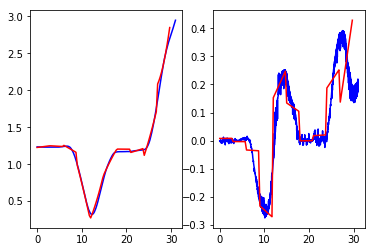

In [187]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t, phi, 'b')
ax1.plot(spl_t, spl_phi, 'r')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(t, yr, 'b')
ax2.plot(spl_t, spl_yr, 'r')